In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
df = pd.read_csv('drug_consumption.csv')
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
# drop rows where Semer (fake drug) is not CL0 or CL1. Assume invalid row.
df_clean = df.loc[(df['Semer'] == 'CL0') | (df['Semer'] == 'CL1')]

# convert 'CLO' and 'CL1' into 0 and 'CL2'-'CL6' into 1
df_clean = df_clean.replace(to_replace=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], value=[0, 0, 1, 1, 1, 1, 1])
df_clean.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0


In [6]:
X = df_clean.drop(columns=['Meth', 'ID'])
y = df_clean['Meth']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [53]:
targets = ['Meth'] 

names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [54]:
for target in targets:
     X = df_clean.drop(columns=[target, 'ID'])
     y = df_clean[target]
     X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        random_state=1)
     sm = SMOTE(random_state=1)
     X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

     print(f"\n\ntarget: {target}")
     for model_name, clf in zip(names, classifiers):
          clf.fit(X_train_res, y_train_res)
          preds = clf.predict(X_test)
          print(f"{model_name}\naccuracy: {accuracy_score(y_test, preds)}",
               f"\nrecall: {recall_score(y_test, preds)}",
               f"\nF1: {f1_score(y_test, preds)}\n",
               f"confusion matrix: \n", 
               f"{confusion_matrix(y_test, preds, labels=[0, 1])}")



target: Meth
Nearest Neighbors
accuracy: 0.7382978723404255 
recall: 0.7959183673469388 
F1: 0.5591397849462366
 confusion matrix: 
 [[269 103]
 [ 20  78]]
Linear SVM
accuracy: 0.7914893617021277 
recall: 0.826530612244898 
F1: 0.6230769230769231
 confusion matrix: 
 [[291  81]
 [ 17  81]]
Gaussian Process
accuracy: 0.8063829787234043 
recall: 0.6530612244897959 
F1: 0.5844748858447489
 confusion matrix: 
 [[315  57]
 [ 34  64]]
Decision Tree
accuracy: 0.8042553191489362 
recall: 0.7959183673469388 
F1: 0.6290322580645161
 confusion matrix: 
 [[300  72]
 [ 20  78]]
Random Forest
accuracy: 0.7702127659574468 
recall: 0.7653061224489796 
F1: 0.5813953488372092
 confusion matrix: 
 [[287  85]
 [ 23  75]]
AdaBoost
accuracy: 0.823404255319149 
recall: 0.7040816326530612 
F1: 0.6244343891402715
 confusion matrix: 
 [[318  54]
 [ 29  69]]
Naive Bayes
accuracy: 0.7659574468085106 
recall: 0.826530612244898 
F1: 0.5955882352941176
 confusion matrix: 
 [[279  93]
 [ 17  81]]
QDA
accuracy: 0.78

In [27]:
X.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.drop(columns=['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff',
                'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
                'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Mushrooms',
                'Nicotine', 'Semer', 'VSA']))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.26589585 0.19805622]
[67.90539457 58.60608802]


In [38]:
pca_arr = pca.transform(X.drop(columns=['Alcohol', 'Amphet', 'Amyl',        
                'Benzos', 'Caff',
                'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
                'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Mushrooms',
                'Nicotine', 'Semer', 'VSA']))
pca_df = pd.DataFrame(pca_arr, columns=['pca1', 'pca2'])

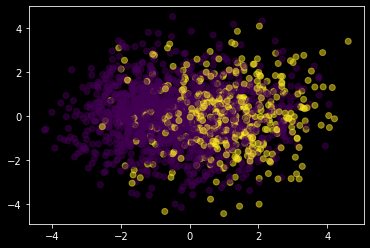

In [39]:
from matplotlib import pyplot as plt
plt.scatter(pca_df['pca1'], pca_df['pca2'], c=y, alpha=.5)